hãy dự báo điểm thi đnash giá năng lực phần ngôn ngữ 

dựa trên điểm T5 T6 sử dụng mô hình hồi quy tuyến tính 

Ngonngu = A0+A1.T5+A2*T6 

với các thiết bị training chiếm 80% và random state =16


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
df= pd.read_csv('dulieuxettuyendaihoc.csv', header=0,delimiter=',', encoding ='utf-8')
df = df[['T5','T6','NGONNGU']]
x=df[['T5','T6']].values # input
y=df[['NGONNGU']].values # output
x=x.astype(float)
y=y.astype(float)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2,random_state=16)


In [42]:

from sklearn import linear_model
model =linear_model.LinearRegression()
model.fit(x_train,y_train)
# sinh viên xác định gitrij tương ứng
# to retrieve the intercept
print(model.intercept_)
# for retrieving the slope
print(model.coef_)

[4.01205005]
[[ 0.19517246 -0.23194661]]


In [43]:
# NGONNGU= 4.01205005+ 0.19517246*T5-0.23194661*T6

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [45]:
steps=[('zscore',StandardScaler()),
       ('minmaxnormalize', MinMaxScaler()),
       ('modelLR',LinearRegression())]

In [46]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('zscore', StandardScaler()),
                ('minmaxnormalize', MinMaxScaler()),
                ('modelLR', LinearRegression())])

In [47]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('zscore', StandardScaler()),
                ('minmaxnormalize', MinMaxScaler()),
                ('modelLR', LinearRegression())])

In [48]:
from sklearn import metrics 

In [49]:
# x test  y test 
y_test_pred=pipe.predict(x_test)

print('Score or R-Squared', pipe.score(x_test,y_test))

print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test,y_test_pred))

print('Mean squared Error:',
      metrics.mean_squared_error(y_test,y_test_pred))

print('root mean squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

print('Mean Absolute percentage Error:',
      metrics.mean_absolute_percentage_error(y_test,y_test_pred))

Score or R-Squared -0.07691460875153755
Mean Absolute Error: 1.1905472933346881
Mean squared Error: 1.987412256869439
root mean squared Error: 1.4097560983622093
Mean Absolute percentage Error: 0.38123864099681043


In [50]:
# x train y train
y_train_pred=pipe.predict(x_train)

print('Score or R-Squared', pipe.score(x_train,y_train))

print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_train,y_train_pred))

print('Mean squared Error:',
      metrics.mean_squared_error(y_train,y_train_pred))

print('root mean squared Error:',
      np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

print('Mean Absolute percentage Error:',
      metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Score or R-Squared 0.01846517069125686
Mean Absolute Error: 1.1471162639928523
Mean squared Error: 2.008686106397567
root mean squared Error: 1.4172812375804482
Mean Absolute percentage Error: 0.3941285255756852


In [ ]:
# Score T5 T6 quá nhỏ 0,018 và -0,07 không giải thích cho điểm ngôn ngữ
#MAE,RMSE,MAPE sai số ở train và test dường như ngang nhau không đánh giá được mô hình tốt hay xấu

<h1>CÁCH 2 ĐỂ SO SÁNH BIỂU ĐỒ SCATTER GIỮA ACRUAL VÀ PREDICT 

In [ ]:
# CÁCH 2 ĐỂ SO SÁNH BIỂU ĐỒ 
# SCATTER GIỮA ACRUAL VÀ PREDICT 

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

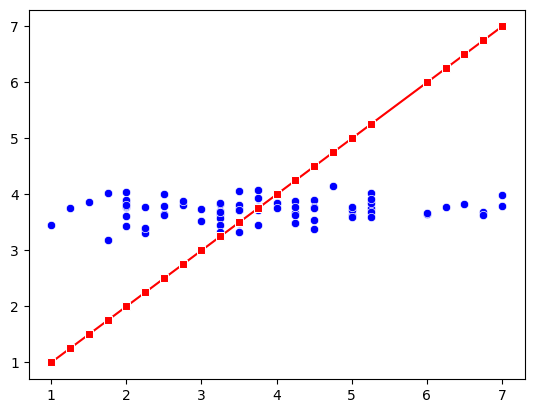

In [54]:
sns.scatterplot(x=y_train.flatten(),y=y_train_pred.flatten(),
                markers='o',color='b')
# scatterplot biểu đồ dự báo 
sns.lineplot(x=y_train.flatten(),y=y_train.flatten(),
                marker='s',color='r')
plt.show()

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

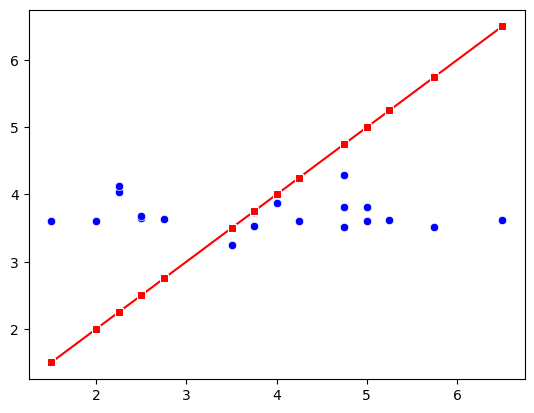

In [55]:
sns.scatterplot(x=y_test.flatten(),y=y_test_pred.flatten(),
                markers='o',color='b')
# scatterplot biểu đồ dự báo 
sns.lineplot(x=y_test.flatten(),y=y_test.flatten(),
                markers='s',color='r')
plt.show()

In [ ]:
# 2 biểu đồ test và train giống nhau

<H1>Cách 3 biểu đồ 

<h5> cột dưới là biết đọc lập còn oy là residual 
<h5> chia đồ thị ra làm bốn phần vẽ các đồ thị trên cùng một chạt 
<h5> [1:0] dòng 1 cột 0

<h3> TRAIN

In [57]:
y_train_pred=model.predict(x_train)
dfTrainValidation = pd.DataFrame(list(zip(x_train[:,0],x_train[:,1],
                                          y_train.flatten(),
                                          y_train_pred.flatten())),
                                          columns=['T5_train','T6_train','y_train','y_train_predicted'])
dfTrainValidation['Residual']= dfTrainValidation['y_train']- dfTrainValidation['y_train_predicted']
dfTrainValidation

,T5_train,T6_train,y_train,y_train_predicted,Residual
0,5.5,5.7,5.25,3.763403,1.486597
1,8.5,7.8,1.50,3.861832,-2.361832
2,8.9,8.5,6.25,3.777539,2.472461
3,4.9,6.5,1.00,3.460742,-2.460742
4,8.0,7.2,4.50,3.903414,0.596586
...,...,...,...,...,...
75,6.3,8.0,4.50,3.386064,1.113936
76,8.4,8.1,3.75,3.772731,-0.022731
77,5.0,5.1,2.00,3.804985,-1.804985
78,3.5,5.6,2.25,3.396253,-1.146253


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

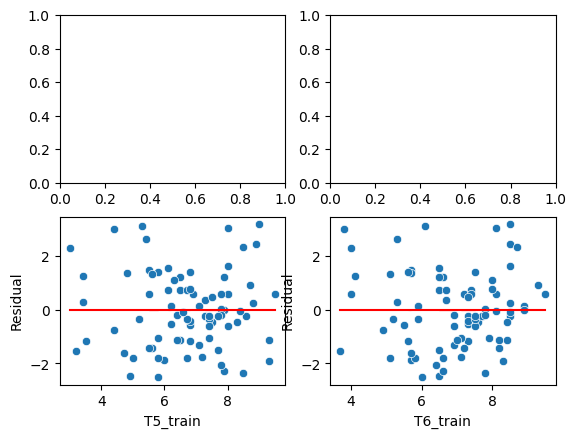

In [60]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTrainValidation,x='T5_train',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTrainValidation,x='T5_train',y=[0]*len(dfTrainValidation),
             color='r',ax=axes[1,0])
sns.lineplot(data=dfTrainValidation,x='T6_train',y=[0]*len(dfTrainValidation),
             color='r',ax=axes[1,1])
sns.scatterplot(data=dfTrainValidation,x='T6_train',y='Residual',ax=axes[1,1])
plt.show()

<h3> Test

In [61]:
y_test_pred=model.predict(x_test)
dftestValidation = pd.DataFrame(list(zip(x_test[:,0],x_test[:,1],
                                          y_test.flatten(),
                                          y_test_pred.flatten())),
                                          columns=['T5_test','T6_test','y_test','y_test_predicted'])
dftestValidation['Residual']= dftestValidation['y_test']- dftestValidation['y_test_predicted']
dftestValidation

,T5_test,T6_test,y_test,y_test_predicted,Residual
0,8.5,8.3,3.75,3.745859,0.004141
1,5.8,3.7,4.75,4.285848,0.464152
2,6.8,9.0,3.50,3.251703,0.248297
3,4.0,5.5,5.75,3.517034,2.232966
4,8.6,8.1,4.75,3.811766,0.938234
5,5.3,6.1,2.75,3.631590,-0.881590
6,8.0,6.6,2.25,4.042582,-1.792582
7,5.4,6.6,3.75,3.535134,0.214866
8,7.1,7.7,2.00,3.611786,-1.611786
9,7.5,6.9,4.00,3.875412,0.124588


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

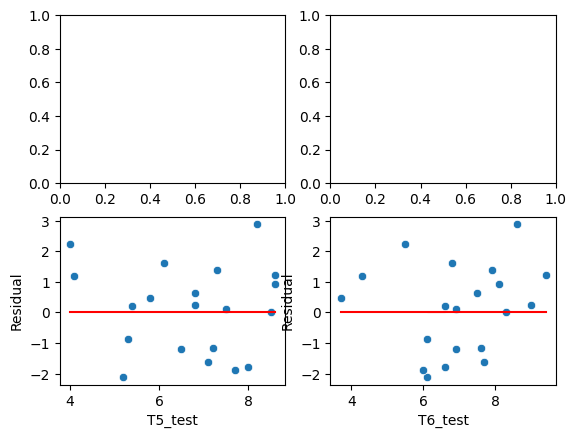

In [62]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dftestValidation,x='T5_test',y='Residual',ax=axes[1,0])
sns.lineplot(data=dftestValidation,x='T5_test',y=[0]*len(dftestValidation),
             color='r',ax=axes[1,0])
sns.lineplot(data=dftestValidation,x='T6_test',y=[0]*len(dftestValidation),
             color='r',ax=axes[1,1])
sns.scatterplot(data=dftestValidation,x='T6_test',y='Residual',ax=axes[1,1])
plt.show()

<h1 > Cách 4 Dùng historam plot

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

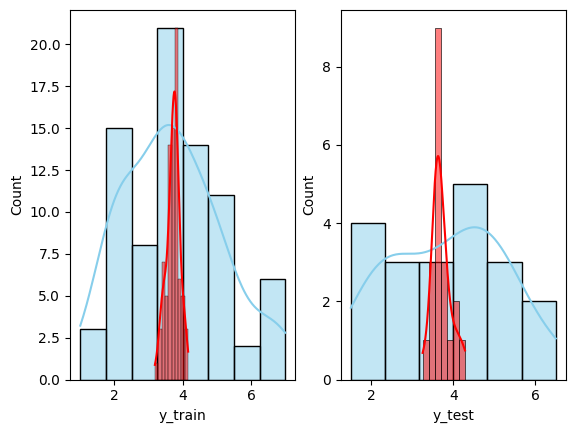

In [67]:
fig,axes=plt.subplots(1,2)
# y_train
sns.histplot(data=dfTrainValidation,x='y_train',color="skyblue",label="Actual",kde=True,ax=axes[0])
sns.histplot(data=dfTrainValidation,x='y_train_predicted',color="red",label="Forecast",kde=True,ax=axes[0])

# y_test
sns.histplot(data=dftestValidation,x='y_test',color="skyblue",label="Actual",kde=True,ax=axes[1])
sns.histplot(data=dftestValidation,x='y_test_predicted',color="red",label="Forecast",kde=True,ax=axes[1])
plt.show()